# **Creating model of Machine Learning **

In [1]:
# importing all libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Importing data sets Loan & Applicant and merge on applicant id to better view**

In [2]:
Loan=pd.read_csv("/content/loan.csv")
Applicant=pd.read_csv("/content/applicant.csv")

data=pd.merge(Loan,Applicant,on='applicant_id')
data.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


# **we have columns which have high missing values and also independent from target column so we need to drop them**

In [3]:
data=data.drop(['Telephone','Other_EMI_plans'],axis=1)



# **fill missing values of categorical variables by mode to better understanding**

In [4]:
data['Purpose']=data['Purpose'].replace(np.nan,data['Purpose'].mode()[0])  
data['Property']=data['Property'].replace(np.nan,data['Property'].mode()[0])
data['Has_been_employed_for_at_least']=data['Has_been_employed_for_at_least'].replace(np.nan,data['Has_been_employed_for_at_least'].mode()[0])
data['Has_been_employed_for_at_most']=data['Has_been_employed_for_at_most'].replace(np.nan,data['Has_been_employed_for_at_most'].mode()[0])
data['Savings_account_balance']=data['Savings_account_balance'].replace(np.nan,data['Savings_account_balance'].mode()[0])
data['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=data['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].replace(np.nan,data['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].mode()[0])
data['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=data['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].replace(np.nan,data['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].mode()[0])

# **Convert categorical column to dummie because of training data**

In [5]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [6]:

#Purpose to Dummies Variable

data = data.merge(pd.get_dummies(data['Purpose'], drop_first=True, prefix='Purpose'), left_index=True, right_index=True)

#Gender feature in dummies
data = data.merge(pd.get_dummies(data['Gender'], drop_first=True, prefix='Gender'), left_index=True, right_index=True)

# Housing get dummies
data = data.merge(pd.get_dummies(data['Housing'], drop_first=True, prefix='Housing'), left_index=True, right_index=True)

# Housing get Saving Accounts
data = data.merge(pd.get_dummies(data["Savings_account_balance"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)

# Property  to Dummies variable
data= data.merge(pd.get_dummies(data['Property'], prefix='Property'), left_index=True, right_index=True)

# Employment Status
data= data.merge(pd.get_dummies(data['Employment_status'], prefix='Employment_status'), left_index=True, right_index=True)

# marital Status
data= data.merge(pd.get_dummies(data['Marital_status'], prefix='Marital_status'), left_index=True, right_index=True)

# 


In [7]:
data.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,...,Property_car or other,Property_real estate,Employment_status_management / self-employed / highly qualified employee / officer,Employment_status_skilled employee / official,Employment_status_unemployed / unskilled - non-resident,Employment_status_unskilled - resident,Marital_status_divorced/separated,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,2,...,0,1,0,1,0,0,0,0,0,1
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,car or other,0,0,2,...,1,0,0,1,0,0,0,0,0,1


# ***Delet original categorical type of columns ***

In [8]:
#Excluding the missing columns
del data["Savings_account_balance"]
del data["Property"]
del data["Gender"]
del data["Employment_status"]
del data["Marital_status"]


In [9]:
del data["Purpose"]

# **Loan application Id is not required for training so we drop it**

In [10]:
data=data.drop(['loan_application_id'],axis=1)


# **again onehot coding of some remaining column to get best accuracy**

In [11]:
# Loan history
data= data.merge(pd.get_dummies(data['Loan_history'], prefix='Loan_history'), left_index=True, right_index=True)

# has been employed for least
data=data.merge(pd.get_dummies(data['Has_been_employed_for_at_least'],prefix='Has_been_employed_for_at_least'),left_index=True,right_index=True)

#has been emplyed for most
data=data.merge(pd.get_dummies(data['Has_been_employed_for_at_most'],prefix='Has_been_employed_for_at_most'),left_index=True,right_index=True)



In [12]:
data=data.drop(['Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)'],axis=1)


# **again we delet orinal categorical columns in data set**

In [13]:
del data['Housing']

In [14]:
del data['Loan_history']
del data['Has_been_employed_for_at_least']
del data['Has_been_employed_for_at_most']

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                                                                              Non-Null Count  Dtype
---  ------                                                                              --------------  -----
 0   applicant_id                                                                        1000 non-null   int64
 1   Months_loan_taken_for                                                               1000 non-null   int64
 2   Principal_loan_amount                                                               1000 non-null   int64
 3   EMI_rate_in_percentage_of_disposable_income                                         1000 non-null   int64
 4   Has_coapplicant                                                                     1000 non-null   int64
 5   Has_guarantor                                                                       1000 non-null   int64
 6   N

# **creating x variable to train and test data**

In [16]:
x=data.drop(['high_risk_applicant'],axis=1)


# **creating y variable to train and test data**

In [17]:
y=data['high_risk_applicant']


# **importing train test split function from sklearn to split data**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# **importing all Machine learning algorithms and models for building model and validation**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import  KFold, cross_val_score


# **Preparing models that suits best for our data set**

In [20]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=None)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

LR: 0.062372 (0.047491)
CART: 0.401396 (0.104438)
RF: 0.245730 (0.063438)
XGB: 0.316777 (0.072564)


# we get good results from DescionTreeClassifier and XGboostClassifier

# **To understand in btter way we plot boxplot to show results**

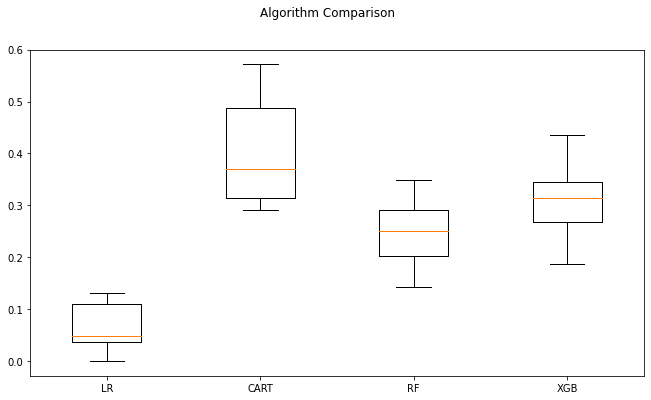

In [21]:
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


DescionClassifer Algorithm and XGboosterClassifier shows better results we can use this and do some tuning.

# **Using Random Forest to predictict the score and Some of Validation Parameters**


In [22]:
#Seting the Hyper Parameters

from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier

model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.041 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.021 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.083 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.125 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.125 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.061 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.021 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.021 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.104 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.062 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [23]:
print(grid_search.best_score_)          #printing best score
print(grid_search.best_params_)

0.39821428571428574
{'max_depth': None, 'max_features': 15, 'n_estimators': 3}


In [24]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)  

#trainning with the best params
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [25]:
#Testing the model 
#Predicting using our  model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
y_pred = rf.predict(x_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.695


[[125  16]
 [ 45  14]]


0.26315789473684215


# very bad results from RandomForestClassifier we should use other algorithm

# **we use DecsionTreeClassifier to train model**

In [26]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [27]:
CART=DecisionTreeClassifier()

# Fitting with train data
model = CART.fit(x_train, y_train)

In [28]:
print("Training score data: ")
print(model.score(x_train, y_train))

Training score data: 
1.0


In [29]:
y_pred = model.predict(x_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.59


[[96 45]
 [37 22]]


              precision    recall  f1-score   support

           0       0.72      0.68      0.70       141
           1       0.33      0.37      0.35        59

    accuracy                           0.59       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.61      0.59      0.60       200



# from descisiontreeClassifer we get good results than  random forest

# **lets verify the roc curve to get better view**

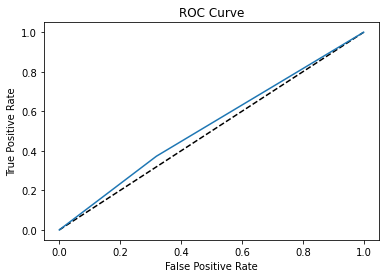

In [30]:
#Predicting proba
y_pred_prob = model.predict_proba(x_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# we are getting good results 

In [31]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', DecisionTreeClassifier()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.64625


In [32]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.59


[[102  39]
 [ 43  16]]


0.27491408934707906


# we get low score from PCA

# **building model using XGBclassifier with hyper parameters to get best results**

In [33]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=2),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

In [34]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 6,
 'min_child_weight': 3,
 'subsample': 0.75}

# ***Lets predict the output using XGBclassifier ***

In [35]:
y_pred = grid_search.predict(x_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.725


[[125  16]
 [ 39  20]]


# we are getting best results from XGB